In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

### <b> Espetro Real </b>

In [2]:
hdul_image_real = fits.open('../Project2/spectral_tests/Image_for_test.fits')

In [3]:
hdul_image_real.info()

Filename: ../Project2/spectral_tests/Image_for_test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2735   (313022,)   float32   


<b> Dados e Header </b>

In [4]:
real_flux = hdul_image_real[0].data
header = hdul_image_real[0].header

In [5]:
header

 [astropy.io.fits.verify]


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =               313022 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '2024-10-20T17:22:16' / Time of last modification                     
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =      3782.3962402344 / Coordinate at reference pixel                  
CDELT1  =   0.0099994344116988 / Coordinate increment par pixel                 
CTYPE1  = 'LINEAR  '        

In [6]:
real_flux

array([0.60600775, 0.5660425 , 0.5239655 , ..., 0.69596714, 0.62668   ,
       0.6272019 ], dtype='>f4')

In [7]:
real_flux.shape

(313022,)

In [8]:
real_flux.dtype

dtype('>f4')

<b> Gráfico dos dados (Intensidade em função do Índice do Pixel) </b>

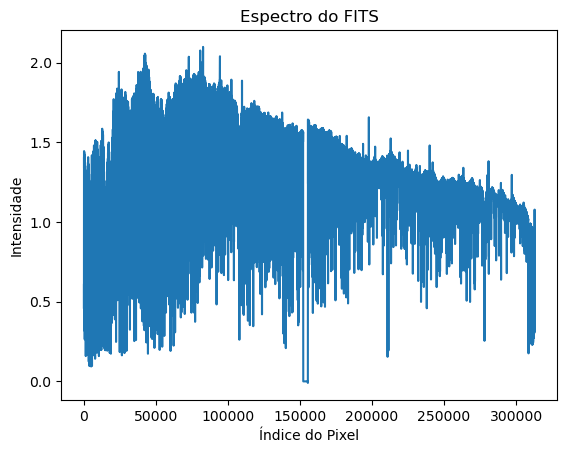

In [9]:
plt.plot(real_flux)
plt.xlabel("Índice do Pixel")
plt.ylabel("Intensidade")
plt.title("Espectro do FITS")
plt.show()

<b>CRPIX1 (Píxel de Referência), CRVAL1 (comprimento de onda do píxel de referência), CDELT1 (largura do pixel em comprimento de onda) </b>

In [10]:
crpix1 = header['CRPIX1']
crval1 = header['CRVAL1']
cdelt1 = header['CDELT1']

crpix1, crval1, cdelt1

(1.0, 3782.3962402344, 0.0099994344116988)

In [11]:
# Generate pixel indices (0-based for Python)
n_pixels = len(real_flux)
pixels = np.arange(n_pixels)

# Calculate wavelengths
wavelength = crval1 + (pixels - (crpix1 - 1)) * cdelt1

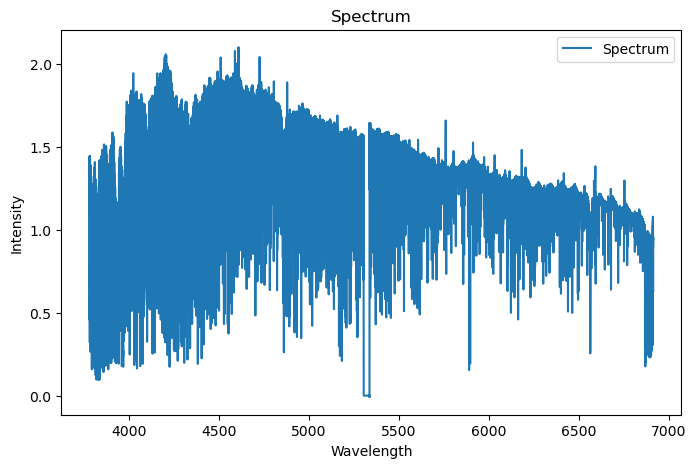

In [12]:
# Espetro da estrela (Intensidade vs Comprimento de Onda)
plt.figure(figsize=(8, 5))
plt.plot(wavelength, real_flux, label="Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.title("Spectrum")
plt.legend()
plt.show()

<b> Gather data from a FITS file (function) and plot Intensity vs Wavelength (function) </b>

In [13]:
def read_spectral_image(fits_file):
    """
    Reads a spectral image from a FITS file and returns the wavelength and relative flux vectors.

    Parameters:
        fits_file (str): Path to the FITS file.

    Returns:
        tuple: (wavelength, relative_flux)
            - wavelength (numpy array): Array of wavelength values.
            - relative_flux (numpy array): Array of relative flux values (normalized data).
    """
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        # Read data and header from the primary HDU
        data = hdul[0].data
        header = hdul[0].header

        # Extract wavelength calibration parameters
        crval1 = header.get('CRVAL1', 0)  # Starting wavelength
        cdelt1 = header.get('CDELT1', 1)  # Wavelength increment per pixel
        crpix1 = header.get('CRPIX1', 1)  # Reference pixel (1-based indexing in FITS)

        # Generate the wavelength array
        n_pixels = len(data)
        pixels = np.arange(n_pixels)  # Pixel indices (0-based for Python)
        wavelength = crval1 + (pixels - (crpix1 - 1)) * cdelt1

    return wavelength, data  # Note that 'data' is relative flux


def plot_spectrum(wavelength, flux, lambda1, lambda2, save_output=False):
    """
    Plots the spectrum between specified wavelength limits and optionally saves the output.

    Parameters:
        wavelength (numpy array): Array of wavelength values.
        flux (numpy array): Array of flux (intensity) values.
        lambda1 (float): Lower wavelength limit.
        lambda2 (float): Upper wavelength limit.
        save_output (bool): If True, returns the wavelength and flux arrays in the specified range.

    Returns:
        tuple: (filtered_wavelength, filtered_flux) if save_output=True
            - filtered_wavelength (numpy array): Wavelength values in the specified range.
            - filtered_flux (numpy array): Flux values in the specified range.
    """
    # Filter data for the specified wavelength range
    mask = (wavelength >= lambda1) & (wavelength <= lambda2)
    filtered_wavelength = wavelength[mask]
    filtered_flux = flux[mask]

    # Plot the spectrum
    plt.figure(figsize=(8, 5))
    plt.plot(filtered_wavelength, filtered_flux, label="Spectrum")
    plt.xlabel("Wavelength")
    plt.ylabel("Flux")
    plt.title(f"Spectrum from {lambda1} to {lambda2}")
    plt.legend()
    plt.show()

    # Optionally return the filtered data
    if save_output:
        return filtered_wavelength, filtered_flux


In [14]:
wavelength_, flux = read_spectral_image("../Project2/spectral_tests/Image_for_test.fits")


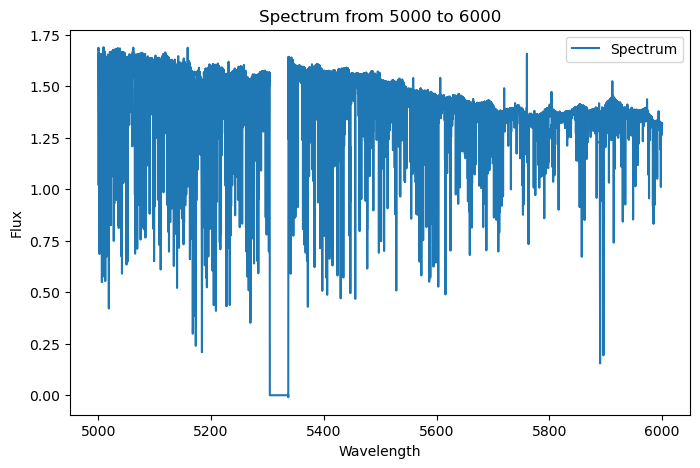

In [15]:
lambda1 = 5000  # Exemplo: Limite inferior em Angstroms
lambda2 = 6000  # Exemplo: Limite superior em Angstroms

plot_spectrum(wavelength_, flux, lambda1, lambda2)


### <b> Espetro Sintético </b>

In [16]:
hdul_image_synth = fits.open('../Project2/spectral_tests/M_p5500g4.0z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS')

In [17]:
hdul_image_synth.info()

Filename: ../Project2/spectral_tests/M_p5500g4.0z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (46056,)   uint8   
  1  M_p5500g4.0z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec    1 BinTableHDU     30   450001R x 3C   [D, E, E]   


<b> Header 0 </b>

In [18]:
synth_data_0 = hdul_image_synth[0].data

In [19]:
synth_data_0

array([ 60,  63, 120, ...,  76,  69,  62], dtype=uint8)

In [20]:
synth_header_0 = hdul_image_synth[0].header

In [21]:
synth_header_0

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                46056 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

<b> Header 1 (with actual data) </b>

In [22]:
synth_data_1 = hdul_image_synth[1].data

In [23]:
synth_header_1 = hdul_image_synth[1].header

In [24]:
synth_header_1

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =               450001 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                    3 / number of columns                              
EXTNAME = 'M_p5500g4.0z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec' / table
TTYPE1  = 'wavelength'         / label for column 1                             
TFORM1  = 'D       '           / format for column 1                            
TUNIT1  = 'A       '           / units for column 1                             
TCOMM1  = 'wavelength'      

In [25]:
synth_data_1

FITS_rec([( 3000.  , 2514100., 0.60795), ( 3000.02, 2352500., 0.56885),
          ( 3000.04,  756030., 0.18281), ...,
          (11999.96, 2024800., 0.99899), (11999.98, 2024800., 0.999  ),
          (12000.  , 2024800., 0.99901)],
         dtype=(numpy.record, [('wavelength', '>f8'), ('flux', '>f4'), ('normalized flux', '>f4')]))

In [26]:
synth_data_1.shape

(450001,)

In [27]:
synth_data_1.columns

ColDefs(
    name = 'wavelength'; format = 'D'; unit = 'A'
    name = 'flux'; format = 'E'; unit = 'erg/cm^2/s/A'
    name = 'normalized flux'; format = 'E'; unit = 'dimensionless'
)

In [28]:
wavelength_synth = synth_data_1['wavelength']
flux_synth = synth_data_1['flux']
normalized_flux_synth = synth_data_1['normalized flux']

<b> Intensity vs Wavelength plot </b>

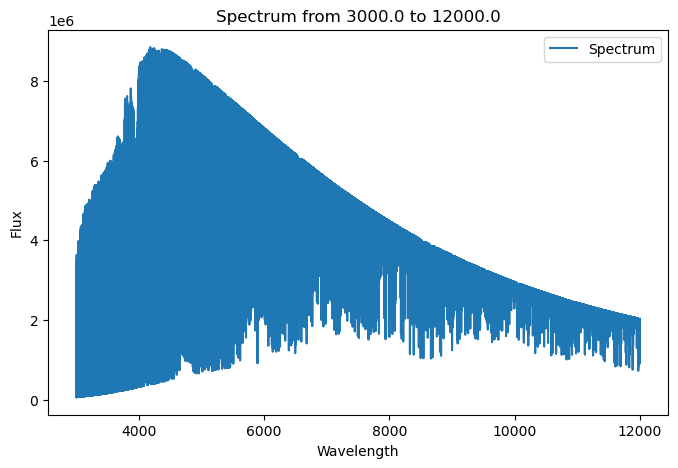

In [29]:
plot_spectrum(wavelength_synth, flux_synth, wavelength_synth.min(), wavelength_synth.max())

In [41]:
# Normalizar o espectro real usando min-max scaling
#normalized_flux_real = (real_flux - real_flux.min()) / (real_flux.max() - real_flux.min())

from sklearn.preprocessing import MinMaxScaler

# Redimensionar os dados para o intervalo [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_flux_real = scaler.fit_transform(real_flux.reshape(-1, 1)).flatten()



In [43]:
normalized_flux_real.max(), normalized_flux_real.min()

(1.0, 0.0)

In [42]:
normalized_flux_real.shape

(313022,)

In [44]:
normalized_flux_synth

array([0.60795, 0.56885, 0.18281, ..., 0.99899, 0.999  , 0.99901],
      dtype='>f4')

In [45]:
normalized_flux_synth.shape

(450001,)

In [46]:
normalized_flux_synth.max(), normalized_flux_synth.min()

(1.0, 0.01404)

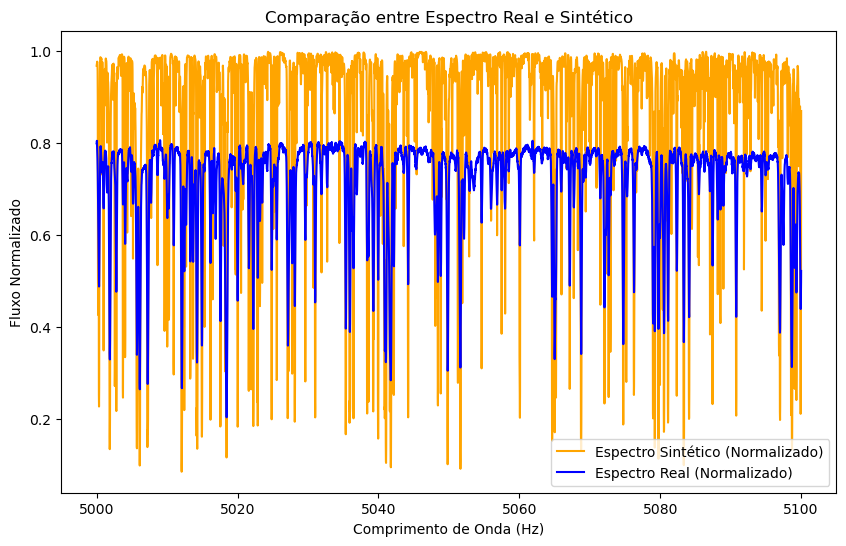

In [48]:
lambda_min = 5000  # Limite inferior do intervalo de comprimento de onda
lambda_max = 5100  # Limite superior do intervalo de comprimento de onda

# Filtrar o espectro real no intervalo [lambda_min, lambda_max]
mask_real = (wavelength >= lambda_min) & (wavelength <= lambda_max)
wavelength_real_filtered = wavelength[mask_real]
normalized_flux_real_filtered = normalized_flux_real[mask_real]

# Filtrar o espectro sintético no intervalo [lambda_min, lambda_max]
mask_synth = (wavelength_synth >= lambda_min) & (wavelength_synth <= lambda_max)
wavelength_synth_filtered = wavelength_synth[mask_synth]
normalized_flux_synth_filtered = normalized_flux_synth[mask_synth]


plt.figure(figsize=(10, 6))

# Plotar o espectro sintético normalizado
plt.plot(wavelength_synth_filtered, normalized_flux_synth_filtered, label="Espectro Sintético (Normalizado)", color="orange")

# Plotar o espectro real normalizado
plt.plot(wavelength_real_filtered, normalized_flux_real_filtered, label="Espectro Real (Normalizado)", color="blue")


# Personalizar o gráfico
plt.xlabel("Comprimento de Onda (Hz)")
plt.ylabel("Fluxo Normalizado")
plt.title("Comparação entre Espectro Real e Sintético")
plt.legend()
plt.show()